In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Checking for availability of GPU for computing

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [22]:
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))
A=0.


In [43]:
Psi_t = lambda x: A + x * N(x)

Writing down the ODE

In [26]:
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

function

In [44]:
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)

In [42]:
z=loss(x)
print(z)

tensor(0.4670, grad_fn=<MeanBackward0>)


In [28]:
optimizer = torch.optim.LBFGS(N.parameters())

In [34]:
x = torch.Tensor(np.linspace(0, 2, 100)[:, None])
print(x)

tensor([[0.0000],
        [0.0202],
        [0.0404],
        [0.0606],
        [0.0808],
        [0.1010],
        [0.1212],
        [0.1414],
        [0.1616],
        [0.1818],
        [0.2020],
        [0.2222],
        [0.2424],
        [0.2626],
        [0.2828],
        [0.3030],
        [0.3232],
        [0.3434],
        [0.3636],
        [0.3838],
        [0.4040],
        [0.4242],
        [0.4444],
        [0.4646],
        [0.4848],
        [0.5051],
        [0.5253],
        [0.5455],
        [0.5657],
        [0.5859],
        [0.6061],
        [0.6263],
        [0.6465],
        [0.6667],
        [0.6869],
        [0.7071],
        [0.7273],
        [0.7475],
        [0.7677],
        [0.7879],
        [0.8081],
        [0.8283],
        [0.8485],
        [0.8687],
        [0.8889],
        [0.9091],
        [0.9293],
        [0.9495],
        [0.9697],
        [0.9899],
        [1.0101],
        [1.0303],
        [1.0505],
        [1.0707],
        [1.0909],
        [1

In [47]:
def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    
    return l




In [48]:
for i in range(10):
    optimizer.step(closure)

In [53]:
xx = np.linspace(0, 2, 100)[:, None]

with torch.no_grad():                             #ODEs solution using neural network
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx) #Solution of ODE using classical methods

[[0.        ]
 [0.02011919]
 [0.04006795]
 [0.05983923]
 [0.07942608]
 [0.09882172]
 [0.11801948]
 [0.13701285]
 [0.15579543]
 [0.17436099]
 [0.19270343]
 [0.21081678]
 [0.22869523]
 [0.24633311]
 [0.26372492]
 [0.28086526]
 [0.29774893]
 [0.31437086]
 [0.33072611]
 [0.34680992]
 [0.36261769]
 [0.37814495]
 [0.39338738]
 [0.40834085]
 [0.42300136]
 [0.43736506]
 [0.45142828]
 [0.46518748]
 [0.47863931]
 [0.49178054]
 [0.50460811]
 [0.51711914]
 [0.52931088]
 [0.54118075]
 [0.55272632]
 [0.56394532]
 [0.57483563]
 [0.5853953 ]
 [0.59562252]
 [0.60551565]
 [0.6150732 ]
 [0.62429381]
 [0.63317632]
 [0.64171968]
 [0.64992301]
 [0.65778558]
 [0.66530682]
 [0.67248628]
 [0.67932368]
 [0.68581889]
 [0.69197192]
 [0.69778291]
 [0.70325217]
 [0.70838013]
 [0.71316737]
 [0.71761462]
 [0.72172271]
 [0.72549266]
 [0.72892559]
 [0.73202275]
 [0.73478555]
 [0.7372155 ]
 [0.73931426]
 [0.7410836 ]
 [0.74252543]
 [0.74364177]
 [0.74443478]
 [0.74490672]
 [0.74505997]
 [0.74489703]
 [0.74442053]
 [0.74

In [54]:
print(yt)

[[0.        ]
 [0.02011919]
 [0.04006795]
 [0.05983923]
 [0.07942608]
 [0.09882172]
 [0.11801948]
 [0.13701285]
 [0.15579543]
 [0.17436099]
 [0.19270343]
 [0.21081678]
 [0.22869523]
 [0.24633311]
 [0.26372492]
 [0.28086526]
 [0.29774893]
 [0.31437086]
 [0.33072611]
 [0.34680992]
 [0.36261769]
 [0.37814495]
 [0.39338738]
 [0.40834085]
 [0.42300136]
 [0.43736506]
 [0.45142828]
 [0.46518748]
 [0.47863931]
 [0.49178054]
 [0.50460811]
 [0.51711914]
 [0.52931088]
 [0.54118075]
 [0.55272632]
 [0.56394532]
 [0.57483563]
 [0.5853953 ]
 [0.59562252]
 [0.60551565]
 [0.6150732 ]
 [0.62429381]
 [0.63317632]
 [0.64171968]
 [0.64992301]
 [0.65778558]
 [0.66530682]
 [0.67248628]
 [0.67932368]
 [0.68581889]
 [0.69197192]
 [0.69778291]
 [0.70325217]
 [0.70838013]
 [0.71316737]
 [0.71761462]
 [0.72172271]
 [0.72549266]
 [0.72892559]
 [0.73202275]
 [0.73478555]
 [0.7372155 ]
 [0.73931426]
 [0.7410836 ]
 [0.74252543]
 [0.74364177]
 [0.74443478]
 [0.74490672]
 [0.74505997]
 [0.74489703]
 [0.74442053]
 [0.74

In [55]:
print(yy)

[[0.        ]
 [0.02015269]
 [0.04012476]
 [0.05991056]
 [0.07950447]
 [0.09890086]
 [0.11809421]
 [0.13707897]
 [0.1558497 ]
 [0.17440097]
 [0.19272742]
 [0.21082374]
 [0.22868475]
 [0.2463052 ]
 [0.26368007]
 [0.28080443]
 [0.29767329]
 [0.31428182]
 [0.33062539]
 [0.34669933]
 [0.36249912]
 [0.37802047]
 [0.39325896]
 [0.40821046]
 [0.422871  ]
 [0.4372366 ]
 [0.45130357]
 [0.4650682 ]
 [0.47852698]
 [0.49167657]
 [0.5045138 ]
 [0.5170354 ]
 [0.52923864]
 [0.54112077]
 [0.55267894]
 [0.5639111 ]
 [0.57481444]
 [0.5853873 ]
 [0.59562737]
 [0.60553294]
 [0.6151024 ]
 [0.62433416]
 [0.633227  ]
 [0.64177966]
 [0.64999133]
 [0.6578611 ]
 [0.6653881 ]
 [0.67257214]
 [0.6794127 ]
 [0.6859098 ]
 [0.6920632 ]
 [0.69787335]
 [0.7033403 ]
 [0.70846456]
 [0.713247  ]
 [0.7176881 ]
 [0.7217889 ]
 [0.7255507 ]
 [0.7289744 ]
 [0.7320616 ]
 [0.7348139 ]
 [0.7372328 ]
 [0.73932004]
 [0.7410778 ]
 [0.7425079 ]
 [0.7436125 ]
 [0.74439406]
 [0.7448552 ]
 [0.74499804]
 [0.74482536]
 [0.7443401 ]
 [0.74

In [60]:
MSE = np.square(np.subtract(yt,yy)).mean()
print(MSE)

5.250762407680518e-09


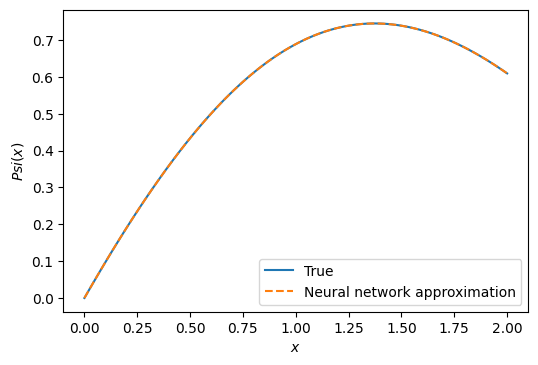

In [64]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best')